In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


%matplotlib inline

In [2]:
path = os.path.join('data', 'balanced_data.csv')
balanced_df = pd.read_csv(path, usecols=[1,2,3,4,5,6])

In [3]:
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

In [4]:
balanced_df.head()

,url,source,title,author,text,authenticity
0,http://www.cnn.com/2017/07/26/health/mental-he...,cnn,A rift among experts over analyzing Trump's me...,['Jen Christensen'],(CNN) You might expect partisan politicians to...,0
1,http://www.politico.com/story/2017/07/27/senat...,politico,Senate releases 'skinny' Obamacare repeal bill,['Rachana Pradhan'],"The so-called ""skinny"" repeal bill eliminates ...",0
2,https://newswithviews.com/dhs-takes-child-from...,newswithviews,DHS takes child from mother gives custody to a...,[],DHS takes child from mother gives custody to a...,1
3,http://www.cbsnews.com/media/10-homes-you-can-...,cbsnews,"10 homes you can buy for $5,000",['Ilyce Glink'],"Believe it or not, there are actual, standing ...",0
4,http://www.cnn.com/2016/09/08/health/rubella-h...,cnn,Can forgotten rubella children of the '60s hol...,"['Story Jessica Ravitz', 'Cnn Video Anne Lagam...","Brooklyn, New York (CNN) One side of the bedro...",0


In [5]:
t = balanced_df[balanced_df.authenticity == 0].shape
f = balanced_df[balanced_df.authenticity == 1].shape

print("# of true news = {} and # of fake news = {}".format(t,f))

# of true news = (1473, 6) and # of fake news = (1473, 6)


In [6]:
df = balanced_df[['title', 'author', 'text', 'authenticity']]

### Author (yes or no)

In [7]:
df.author[df.author == '[]'] = 0
df.author[df.author != 0]  = 1
df.head()

/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/pandas/core/generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(c

,title,author,text,authenticity
0,A rift among experts over analyzing Trump's me...,1,(CNN) You might expect partisan politicians to...,0
1,Senate releases 'skinny' Obamacare repeal bill,1,"The so-called ""skinny"" repeal bill eliminates ...",0
2,DHS takes child from mother gives custody to a...,0,DHS takes child from mother gives custody to a...,1
3,"10 homes you can buy for $5,000",1,"Believe it or not, there are actual, standing ...",0
4,Can forgotten rubella children of the '60s hol...,1,"Brooklyn, New York (CNN) One side of the bedro...",0


### Rate of capitals in title

In [8]:
df['title_list'] = [list(x) for x in df.title]
df.head()

/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,title,author,text,authenticity,title_list
0,A rift among experts over analyzing Trump's me...,1,(CNN) You might expect partisan politicians to...,0,"[A, , r, i, f, t, , a, m, o, n, g, , e, x, ..."
1,Senate releases 'skinny' Obamacare repeal bill,1,"The so-called ""skinny"" repeal bill eliminates ...",0,"[S, e, n, a, t, e, , r, e, l, e, a, s, e, s, ..."
2,DHS takes child from mother gives custody to a...,0,DHS takes child from mother gives custody to a...,1,"[D, H, S, , t, a, k, e, s, , c, h, i, l, d, ..."
3,"10 homes you can buy for $5,000",1,"Believe it or not, there are actual, standing ...",0,"[1, 0, , h, o, m, e, s, , y, o, u, , c, a, ..."
4,Can forgotten rubella children of the '60s hol...,1,"Brooklyn, New York (CNN) One side of the bedro...",0,"[C, a, n, , f, o, r, g, o, t, t, e, n, , r, ..."


In [9]:
num_cap_title = df.title_list.apply(lambda x: len([a for a in x if a.isupper()]))
len_title = df.title.str.len()
df['caprate_title'] = num_cap_title/len_title
df.caprate_title /= df.caprate_title.mean()
df.head()

,title,author,text,authenticity,title_list,caprate_title
0,A rift among experts over analyzing Trump's me...,1,(CNN) You might expect partisan politicians to...,0,"[A, , r, i, f, t, , a, m, o, n, g, , e, x, ...",0.251010
1,Senate releases 'skinny' Obamacare repeal bill,1,"The so-called ""skinny"" repeal bill eliminates ...",0,"[S, e, n, a, t, e, , r, e, l, e, a, s, e, s, ...",0.311034
2,DHS takes child from mother gives custody to a...,0,DHS takes child from mother gives custody to a...,1,"[D, H, S, , t, a, k, e, s, , c, h, i, l, d, ...",0.340656
3,"10 homes you can buy for $5,000",1,"Believe it or not, there are actual, standing ...",0,"[1, 0, , h, o, m, e, s, , y, o, u, , c, a, ...",0.000000
4,Can forgotten rubella children of the '60s hol...,1,"Brooklyn, New York (CNN) One side of the bedro...",0,"[C, a, n, , f, o, r, g, o, t, t, e, n, , r, ...",0.207356


In [10]:
f = df.caprate_title[df.authenticity == 1].mean()
t = df.caprate_title[df.authenticity == 0].mean()

print("capital rate of true news title = {} and capital rate of fake news title = {}".format(t,f))

capital rate of true news title = 0.7117083803469406 and capital rate of fake news title = 1.2882916196530592


### exaggerating puctuation in title

In [11]:
num_exag_title = df.title_list.apply(lambda x: len([a for a in x if (a == ('!' or '?' or ':' or '-'))]))
df['exagg_puct_title'] = num_exag_title/len_title
df.exagg_puct_title /= df.exagg_puct_title.mean()
f = df.exagg_puct_title[df.authenticity == 1].mean()
t = df.exagg_puct_title[df.authenticity == 0].mean()

print("exaggerating punctuation rate of true news title = {} and exaggerating punctuation rate of fake news title = {}".format(t,f))

exaggerating punctuation rate of true news title = 0.1816252035580772 and exaggerating punctuation rate of fake news title = 1.8183747964419223


### Rate of capitals in text

In [12]:
df['text_list'] = [list(x) for x in df.text]
num_cap_text = df.text_list.apply(lambda x: len([a for a in x if a.isupper()]))
len_text = df.text.str.len()
df['caprate_text'] = num_cap_text/len_text
df.caprate_text /= df.caprate_text.mean()
f = df.caprate_text[df.authenticity == 1].mean()
t = df.caprate_text[df.authenticity == 0].mean()

print("capital rate of true news text = {} and capital rate of fake news text = {}".format(t,f))

capital rate of true news text = 1.0153860571309468 and capital rate of fake news text = 0.9846139428690485


In [13]:
selected_df = df[['author', 'caprate_title', 'exagg_puct_title']]
selected_df.head()

,author,caprate_title,exagg_puct_title
0,1,0.251010,0.0
1,1,0.311034,0.0
2,0,0.340656,0.0
3,1,0.000000,0.0
4,1,0.207356,0.0


In [14]:
df.head()

,title,author,text,authenticity,title_list,caprate_title,exagg_puct_title,text_list,caprate_text
0,A rift among experts over analyzing Trump's me...,1,(CNN) You might expect partisan politicians to...,0,"[A, , r, i, f, t, , a, m, o, n, g, , e, x, ...",0.251010,0.0,"[(, C, N, N, ), , Y, o, u, , m, i, g, h, t, ...",0.672269
1,Senate releases 'skinny' Obamacare repeal bill,1,"The so-called ""skinny"" repeal bill eliminates ...",0,"[S, e, n, a, t, e, , r, e, l, e, a, s, e, s, ...",0.311034,0.0,"[T, h, e, , s, o, -, c, a, l, l, e, d, , "", ...",0.898673
2,DHS takes child from mother gives custody to a...,0,DHS takes child from mother gives custody to a...,1,"[D, H, S, , t, a, k, e, s, , c, h, i, l, d, ...",0.340656,0.0,"[D, H, S, , t, a, k, e, s, , c, h, i, l, d, ...",0.897305
3,"10 homes you can buy for $5,000",1,"Believe it or not, there are actual, standing ...",0,"[1, 0, , h, o, m, e, s, , y, o, u, , c, a, ...",0.000000,0.0,"[B, e, l, i, e, v, e, , i, t, , o, r, , n, ...",0.327902
4,Can forgotten rubella children of the '60s hol...,1,"Brooklyn, New York (CNN) One side of the bedro...",0,"[C, a, n, , f, o, r, g, o, t, t, e, n, , r, ...",0.207356,0.0,"[B, r, o, o, k, l, y, n, ,, , N, e, w, , Y, ...",0.573194


In [15]:
bar_df = pd.DataFrame(columns = ['Real_news_mean', 'Real_news_sterr', 'Fake_news_mean', 'Fake_news_sterr'], index = ['author','caprate_title', 'exagg_puct_title'])
bar_df.Real_news_mean = [df.author[df.authenticity == 0].mean(), df.caprate_title[df.authenticity == 0].mean(), df.exagg_puct_title[df.authenticity == 0].mean() ]
bar_df.Fake_news_mean = [df.author[df.authenticity == 1].mean(), df.caprate_title[df.authenticity == 1].mean(), df.exagg_puct_title[df.authenticity == 1].mean() ]
bar_df.Real_news_sterr =[df.author[df.authenticity == 0].std()/np.sqrt(df.shape[0]), df.caprate_title[df.authenticity == 0].std()/np.sqrt(df.shape[0]), df.exagg_puct_title[df.authenticity == 0].std()/np.sqrt(df.shape[0]) ]
bar_df.Fake_news_sterr =[df.author[df.authenticity == 1].std()/np.sqrt(df.shape[0]), df.caprate_title[df.authenticity == 1].std()/np.sqrt(df.shape[0]), df.exagg_puct_title[df.authenticity == 1].std()/np.sqrt(df.shape[0]) ]
bar_df

,Real_news_mean,Real_news_sterr,Fake_news_mean,Fake_news_sterr
author,0.727766,0.008203,0.511881,0.009213
caprate_title,0.711708,0.012993,1.288292,0.017557
exagg_puct_title,0.181625,0.043996,1.818375,0.139297


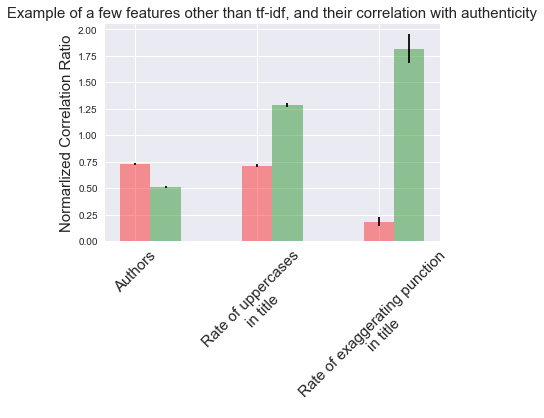

In [16]:
f, ax = plt.subplots(1,1)
ax.legend(labels = ['Real news', 'Fake news'], loc = 'upper right', bbox_to_anchor=(1.2, 0.5))
width = 0.25
groups = [1,2,3]
ax.set_ylabel('Normarlized Correlation Ratio',fontsize = 15)
ax.set_title('Example of a few features other than tf-idf, and their correlation with authenticity', fontsize = 15)
ax.set_xticks(groups)
ax.set_xticklabels(('Authors', 'Rate of uppercases\nin title', 'Rate of exaggerating punction\nin title'), fontsize = 15,rotation = 45)


c = (x for x in ['red','green'])
for a in ['Real_news', 'Fake_news']:
    ax.bar(groups, bar_df[a+'_mean'], width, color=next(c), alpha = 0.4, yerr=bar_df[a+'_sterr'])
    groups = [(x + width) for x in groups]

plt.show()

In [17]:
path = os.path.join('data','additional_features.csv')
selected_df.to_csv(path)